In [1]:
ls

converted_train.csv           ml_first.attempt.ipynb
data-cleaning.ipynb           prediction_ridge_1.csv
derby.log                     test_converted
metastore_db/                 test_converted.csv
ml_first.attempt-Copy1.ipynb  xgboost.ipynb


In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("converted_train.csv")

In [4]:
test = pd.read_csv("test_converted.csv")

In [5]:
train.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,...,319,108,17,135,236,2,91,195,14,16331452


In [6]:
test.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,...,8,0,0,0,1,10,1,0,14,1
1,2015-07-01,79.2,30.4,8,17,1,0.0,3,1.0,1.0,...,4,1,1,0,2,11,0,1,12,1
2,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,...,42,11,4,0,10,21,0,10,71,11
3,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,...,1,1,2,0,0,10,0,0,2,0
4,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,...,5,1,1,0,2,12,0,1,11,1


In [7]:
train = train.set_index('timestamp')

In [8]:
train.shape

(30471, 290)

In [9]:
for i in test.columns:
    if i not in train.columns:
        print(i)

timestamp


In [10]:
y = train['price_doc']

In [11]:
y.shape

(30471,)

In [12]:
train.columns[-1]

'price_doc'

In [13]:
df = train.drop("price_doc", 1)

In [14]:
df.shape

(30471, 289)

In [15]:
for i in df.columns:
    if not i  in test.columns:
        print(i)

In [16]:
X_trans = pd.get_dummies(df)
test_trans = pd.get_dummies(test)

In [17]:
X_trans.shape

(30471, 435)

In [18]:
test_trans.shape

(7662, 708)

In [19]:
# # split the data into:
# 1) 10,000 training data
# 2) 5,000 validation data

In [20]:
X_train = X_trans[30471-5000-10000:30471-5000]
X_test = X_trans[30471-5000:30471]

In [21]:
print(X_train.shape)
print(X_test.shape)

(10000, 435)
(5000, 435)


In [22]:
y_train = y[30471-5000-10000:30471-5000]
y_test = y[30471-5000:30471]

In [23]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (10000,)
y_test shape:  (5000,)


In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import  xgboost as xgb

In [25]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
        prefit=False, threshold='median')

In [26]:
X_train_rf = select.transform(X_train)
X_test_rf = select.transform(X_test)

# Random Forest select half of the features as important ones 

In [27]:
print("X_train shape: ", X_train_rf.shape)
print("X_test shape: ", X_test_rf.shape)

X_train shape:  (10000, 218)
X_test shape:  (5000, 218)


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train_rf)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_scaled = scaler.transform(X_train_rf)
X_test_scaled = scaler.transform(X_test_rf)

In [31]:
pca = PCA().fit(X_train_scaled)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import seaborn as sns; sns.set()

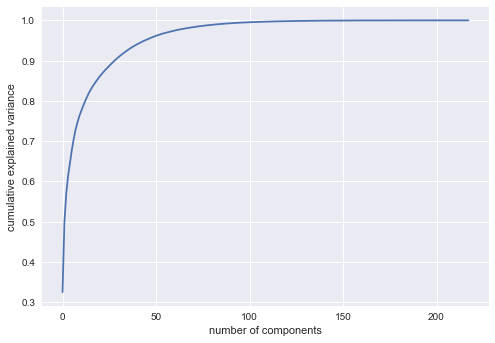

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [35]:
print("variance explaned : ", round(np.cumsum(pca.explained_variance_ratio_)[50], 3))

variance explaned :  0.962


In [36]:
pca = PCA(n_components=50)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

print("Original shape: {0} ".format(X_train_scaled.shape))
print("Transformed shape: {0}".format(X_pca_test.shape))

Original shape: (10000, 218) 
Transformed shape: (5000, 50)


In [37]:
print("variance explained by pca(=50 components)", round(np.cumsum(pca.explained_variance_ratio_)[-1], 3))

variance explained by pca(=50 components) 0.96


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [39]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 
              'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8,
             'objective': 'reg:linear'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                             cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [ ]:
optimized_GBM.fit(X_pca, y_train)

/Users/kentasuzuki/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [193]:
grid_ridge = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_pca, y_train)
pred_ridge = grid_ridge.predict(X_pca_test)

In [195]:
print("Best paramters: ", grid_ridge.best_params_)
print("Test set mse : {:.3f}".format(grid_ridge.score(X_pca_test, y_test)))

Best paramters:  {'ridge__alpha': 100}
Test set mse : -14403157824545.154


In [196]:
pred_ridge.shape

(5000,)

In [206]:
test =  test.set_index('timestamp')
test_trans = pd.get_dummies(test)
test_trans.shape

(7662, 434)

In [207]:
for i in X_trans.columns:
    if i not in test_trans.columns:
        print(i)

sub_area_Poselenie Klenovskoe


In [208]:
print(df.shape)
print(test.shape)

(30471, 289)
(7662, 289)


In [209]:
for i in df.columns:
    if i not in test.columns:
        print(i)

In [210]:
# since there is less column(one column) than the train data, I will add bias column
bias = np.ones(7662)
test_trans['bias'] = bias

In [211]:
test_trans.shape

(7662, 435)

In [212]:
test_trans = select.transform(test_trans)
test_trans = scaler.transform(test_trans)
test_pca = pca.transform(test_trans)

In [213]:
test_pca.shape

(7662, 50)

In [214]:
ls ../

macro.csv              test.csv               work-space/
sample_submission.csv  train.csv


In [215]:
sample = pd.read_csv("../sample_submission.csv")

In [216]:
sample.head()

,id,price_doc
0,30474,7118500.41
1,30475,7118500.41
2,30476,7118500.41
3,30477,7118500.41
4,30478,7118500.41


In [217]:
final_prediction = grid_ridge.predict(test_pca)

In [218]:
# replace negative values with zeros

pred_trans = np.array([value if value >= 0 else 0 for value in final_prediction ])

In [219]:
original_test = pd.read_csv("../test.csv")

In [220]:
original_test.shape

(7662, 291)

In [221]:
ids = original_test['id'].values

In [222]:
ids[:8]

array([30474, 30475, 30476, 30477, 30478, 30479, 30480, 30481])

In [223]:
ids.shape

(7662,)

In [224]:
predictions = pd.DataFrame({'id': ids, 
                             'price_doc': pred_trans})

In [225]:
predictions.head()

,id,price_doc
0,30474,4.910830e+06
1,30475,8.357840e+06
2,30476,5.559069e+06
3,30477,7.302135e+06
4,30478,5.337877e+06


In [226]:
predictions.to_csv("prediction_ridge_1.csv", index=False)

In [227]:
data = pd.read_csv("prediction_ridge_1.csv")

In [228]:
data.head(n=34)

,id,price_doc
0,30474,4.910830e+06
1,30475,8.357840e+06
2,30476,5.559069e+06
3,30477,7.302135e+06
4,30478,5.337877e+06
5,30479,8.630981e+06
6,30480,3.622444e+06
7,30481,3.252929e+06
8,30482,5.525912e+06
9,30483,4.431300e+06
